Import Libraries

In [1]:
import sys
print(sys.executable)

/usr/local/anaconda3/bin/python


In [34]:
# Import libraries.
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_regression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


In [6]:
project_dir = os.path.dirname(os.getcwd())
data_path = os.path.join(project_dir, "cleandata", "combined_personas_sample.csv")

df = pd.read_csv(
    data_path,
    low_memory=False,
    na_values=["NaN", "NA", "N/A", "", " "],
    dtype={"UPM": str}
)
# Display DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 66 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ANIO                                  80000 non-null  int64  
 1   ID_PERSONA                            80000 non-null  object 
 2   LLAVE_ENTIDAD                         80000 non-null  int64  
 3   LLAVE_MUNICIPIO                       80000 non-null  int64  
 4   CLAVE_MUNICIPIO_INEGI(CLAVE_DE_AGEM)  80000 non-null  int64  
 5   LLAVE_LOCALIDAD                       80000 non-null  int64  
 6   CLAVE_LOCALIDAD_INEGI                 21039 non-null  float64
 7   ID_VIVIENDA                           80000 non-null  int64  
 8   ID_HOGAR                              24000 non-null  float64
 9   LLAVE_COBERTURA                       80000 non-null  int64  
 10  LLAVE_CLASEVIVIENDA                   80000 non-null  int64  
 11  LLAVE_SEXO     

In [7]:
# 1. Define continuous and categorical variables manually
continuous_vars = [
    'INGRESO', 'HORAS_TRABAJADAS', 'ESCOLARIDAD_ACUMULADA', 'ESCOLARIDAD', 'EDAD',
    'HIJOS_NACIDOS', 'HIJOS_VIVOS', 'HIJOS_FALLECIDOS'
]

categorical_vars = [
    'LLAVE_SEXO', 'LLAVE_PARENTESCO', 'LLAVE_IDENTMADRE', 'LLAVE_IDENTPADRE',
    'LLAVE_PAIS_NAC', 'LLAVE_ENTIDAD_NAC', 'LLAVE_NACIONALIDAD', 'LLAVE_SERSALUD',
    'LLAVE_AFRODES', 'LLAVE_REGISNAC', 'LLAVE_RELIGION', 'LLAVE_HLENGUA',
    'LLAVE_LENGUAMAT', 'LLAVE_HESPANOL', 'LLAVE_ELENGUA', 'LLAVE_PERTEINDIGENA',
    'LLAVE_ASISESCOLAR', 'LLAVE_PAIS_ASISESCOLAR', 'LLAVE_ENTIDAD_ASISESCOLAR',
    'LLAVE_MUNICIPIO_ASISESCOLAR', 'LLAVE_TIETRASLADO_ESCOLAR',
    'LLAVE_MEDTRASLADO_ESCOLAR', 'LLAVE_NIVACAD', 'LLAVE_CARRERA',
    'LLAVE_ALFABETISMO', 'LLAVE_PAIS_RES5A', 'LLAVE_ENTIDAD_RES5A',
    'LLAVE_MUNICIPIO_RES5A', 'LLAVE_CAUSAMIGRACION', 'LLAVE_SITUACONYUGAL',
    'LLAVE_IDENTPAREJA', 'LLAVE_ACTPRIMARIA', 'LLAVE_OCUPACION', 'LLAVE_SITTRA',
    'LLAVE_ACTECONOMICA', 'ACTIVIDAD_ECONOMICA_INEGI', 'LLAVE_PAIS_TRABAJO',
    'LLAVE_ENTIDAD_TRABAJO', 'LLAVE_MUNICIPIO_TRABAJO',
    'LLAVE_TIETRASLADO_TRABAJO', 'LLAVE_MEDTRASLADO_TRABAJO',
    'LLAVE_TAMLOC', 'ESTRATO', 'UPM', 'MERCADO_TRABAJO_LOCAL'
]

# 2. Convert types
for col in categorical_vars:
    if col in df.columns:
        df[col] = df[col].astype('category')

for col in continuous_vars:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # ensures float

# Display DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 66 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   ANIO                                  80000 non-null  int64   
 1   ID_PERSONA                            80000 non-null  object  
 2   LLAVE_ENTIDAD                         80000 non-null  int64   
 3   LLAVE_MUNICIPIO                       80000 non-null  int64   
 4   CLAVE_MUNICIPIO_INEGI(CLAVE_DE_AGEM)  80000 non-null  int64   
 5   LLAVE_LOCALIDAD                       80000 non-null  int64   
 6   CLAVE_LOCALIDAD_INEGI                 21039 non-null  float64 
 7   ID_VIVIENDA                           80000 non-null  int64   
 8   ID_HOGAR                              24000 non-null  float64 
 9   LLAVE_COBERTURA                       80000 non-null  int64   
 10  LLAVE_CLASEVIVIENDA                   80000 non-null  int64   
 11  LL

In [8]:
# Calculate the percentage of non-null values per column
null_percentage = np.round(100 - df.notnull().mean() * 100)

# Create a DataFrame to display the results
non_null_percentage_df = pd.DataFrame(null_percentage, columns=['Percentage of Null Values'])

# Print the DataFrame
print(non_null_percentage_df.to_string())

                                      Percentage of Null Values
ANIO                                                        0.0
ID_PERSONA                                                  0.0
LLAVE_ENTIDAD                                               0.0
LLAVE_MUNICIPIO                                             0.0
CLAVE_MUNICIPIO_INEGI(CLAVE_DE_AGEM)                        0.0
LLAVE_LOCALIDAD                                             0.0
CLAVE_LOCALIDAD_INEGI                                      74.0
ID_VIVIENDA                                                 0.0
ID_HOGAR                                                   70.0
LLAVE_COBERTURA                                             0.0
LLAVE_CLASEVIVIENDA                                         0.0
LLAVE_SEXO                                                  0.0
LLAVE_PARENTESCO                                            0.0
LLAVE_IDENTMADRE                                            0.0
LLAVE_IDENTPADRE                        

Remove all columns with more than 10.5% missing values.

In [9]:
# Calculate the percentage of missing values per column
missing_percentage = df.isnull().mean() * 100

# Filter out columns with more than 5% missing values
columns_to_keep = missing_percentage[missing_percentage <= 10.5].index

# Create a new DataFrame with only the columns to keep
df_filtered = df[columns_to_keep]

# Calculate the percentage of non-null values per column
null_percentage = np.round(100 - df_filtered.notnull().mean() * 100)

# Create a DataFrame to display the results
non_null_percentage_df = pd.DataFrame(null_percentage, columns=['Percentage of Null Values'])

# Print the DataFrame
print(non_null_percentage_df)

                                      Percentage of Null Values
ANIO                                                        0.0
ID_PERSONA                                                  0.0
LLAVE_ENTIDAD                                               0.0
LLAVE_MUNICIPIO                                             0.0
CLAVE_MUNICIPIO_INEGI(CLAVE_DE_AGEM)                        0.0
LLAVE_LOCALIDAD                                             0.0
ID_VIVIENDA                                                 0.0
LLAVE_COBERTURA                                             0.0
LLAVE_CLASEVIVIENDA                                         0.0
LLAVE_SEXO                                                  0.0
LLAVE_PARENTESCO                                            0.0
LLAVE_IDENTMADRE                                            0.0
LLAVE_IDENTPADRE                                            0.0
LLAVE_PAIS_NAC                                              0.0
LLAVE_ENTIDAD_NAC                       

In [10]:
# Count the number of remaining rows
remaining_cols = df_filtered.shape[1]

# Print the number of remaining rows
print("Number of remaining columns after removing those with >10% missing values:", remaining_cols)

Number of remaining columns after removing those with >10% missing values: 58


Remove all rows with missing values

In [11]:
# Remove all rows with missing values
df_cleaned = df_filtered.dropna()

# Count the number of remaining rows
remaining_rows = df_cleaned.shape[0]

# Print the number of remaining rows
print("Number of remaining rows after removing rows with missing values:", remaining_rows)

Number of remaining rows after removing rows with missing values: 65861


Using df.info() and df.describe(), describe the remaining columns.

In [12]:
# Display information about the remaining columns
df_cleaned.info()

# Display descriptive statistics for the remaining columns
df_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65861 entries, 8000 to 79999
Data columns (total 58 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   ANIO                                  65861 non-null  int64   
 1   ID_PERSONA                            65861 non-null  object  
 2   LLAVE_ENTIDAD                         65861 non-null  int64   
 3   LLAVE_MUNICIPIO                       65861 non-null  int64   
 4   CLAVE_MUNICIPIO_INEGI(CLAVE_DE_AGEM)  65861 non-null  int64   
 5   LLAVE_LOCALIDAD                       65861 non-null  int64   
 6   ID_VIVIENDA                           65861 non-null  int64   
 7   LLAVE_COBERTURA                       65861 non-null  int64   
 8   LLAVE_CLASEVIVIENDA                   65861 non-null  int64   
 9   LLAVE_SEXO                            65861 non-null  category
 10  LLAVE_PARENTESCO                      65861 non-null  category
 11 

,ANIO,LLAVE_ENTIDAD,LLAVE_MUNICIPIO,CLAVE_MUNICIPIO_INEGI(CLAVE_DE_AGEM),LLAVE_LOCALIDAD,ID_VIVIENDA,LLAVE_COBERTURA,LLAVE_CLASEVIVIENDA,FACTOR_EXP,EDAD,ESCOLARIDAD,ESCOLARIDAD_ACUMULADA,INGRESO
count,65861.000000,65861.000000,65861.000000,65861.000000,6.586100e+04,6.586100e+04,65861.000000,65861.000000,65861.000000,65861.000000,65861.000000,65861.000000,6.586100e+04
mean,2011.956697,17.728413,1077.098814,76.164969,2.610376e+06,2.012059e+15,1.030321,0.649975,7.904739,30.807640,2.982706,6.312552,7.632977e+03
std,6.936921,7.885532,759.516520,99.566432,5.774933e+06,7.012302e+12,0.943294,1.090415,12.516898,20.411292,1.810090,4.669689,7.793284e+05
min,2000.000000,1.000000,1.000000,1.000000,0.000000e+00,2.000000e+15,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000e+00
25%,2010.000000,12.000000,403.000000,17.000000,0.000000e+00,2.010000e+15,0.000000,0.000000,2.000000,14.000000,2.000000,2.000000,0.000000e+00
50%,2015.000000,16.000000,894.000000,42.000000,0.000000e+00,2.015110e+15,1.000000,0.000000,4.000000,27.000000,3.000000,6.000000,0.000000e+00
75%,2015.000000,23.000000,1804.000000,95.000000,2.801390e+05,2.015302e+15,2.000000,1.000000,9.000000,44.000000,4.000000,9.000000,1.500000e+03
max,2020.000000,32.000000,2469.000000,570.000000,2.455004e+07,2.020321e+15,2.000000,10.000000,646.000000,110.000000,9.000000,24.000000,1.000000e+08


I'll start by spliting the data in train and test sets.

In [13]:
# Define the features (X) and target (y)
X = df_cleaned.drop(columns=['INGRESO'])
y = df_cleaned['INGRESO']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (59274, 57)
X_test shape: (6587, 57)
y_train shape: (59274,)
y_test shape: (6587,)


In [14]:
median = X_train["ESCOLARIDAD_ACUMULADA"].median()
print(median)

6.0


Variables Selection

In [15]:
X_train.columns

Index(['ANIO', 'ID_PERSONA', 'LLAVE_ENTIDAD', 'LLAVE_MUNICIPIO',
       'CLAVE_MUNICIPIO_INEGI(CLAVE_DE_AGEM)', 'LLAVE_LOCALIDAD',
       'ID_VIVIENDA', 'LLAVE_COBERTURA', 'LLAVE_CLASEVIVIENDA', 'LLAVE_SEXO',
       'LLAVE_PARENTESCO', 'LLAVE_IDENTMADRE', 'LLAVE_IDENTPADRE',
       'LLAVE_PAIS_NAC', 'LLAVE_ENTIDAD_NAC', 'LLAVE_NACIONALIDAD',
       'LLAVE_SERSALUD', 'LLAVE_AFRODES', 'LLAVE_REGISNAC', 'LLAVE_RELIGION',
       'LLAVE_HLENGUA', 'LLAVE_LENGUAMAT', 'LLAVE_HESPANOL', 'LLAVE_ELENGUA',
       'LLAVE_PERTEINDIGENA', 'LLAVE_ASISESCOLAR', 'LLAVE_PAIS_ASISESCOLAR',
       'LLAVE_ENTIDAD_ASISESCOLAR', 'LLAVE_MUNICIPIO_ASISESCOLAR',
       'LLAVE_TIETRASLADO_ESCOLAR', 'LLAVE_MEDTRASLADO_ESCOLAR',
       'LLAVE_NIVACAD', 'LLAVE_CARRERA', 'LLAVE_ALFABETISMO',
       'LLAVE_PAIS_RES5A', 'LLAVE_ENTIDAD_RES5A', 'LLAVE_MUNICIPIO_RES5A',
       'LLAVE_CAUSAMIGRACION', 'LLAVE_SITUACONYUGAL', 'LLAVE_IDENTPAREJA',
       'LLAVE_ACTPRIMARIA', 'LLAVE_OCUPACION', 'LLAVE_SITTRA',
       'LLAVE_AC

Data Exploration

In [16]:
# Step 1: Concatenate X_train and y_train 
train_data = pd.concat([X_train, y_train], axis=1)
train_data.columns

Index(['ANIO', 'ID_PERSONA', 'LLAVE_ENTIDAD', 'LLAVE_MUNICIPIO',
       'CLAVE_MUNICIPIO_INEGI(CLAVE_DE_AGEM)', 'LLAVE_LOCALIDAD',
       'ID_VIVIENDA', 'LLAVE_COBERTURA', 'LLAVE_CLASEVIVIENDA', 'LLAVE_SEXO',
       'LLAVE_PARENTESCO', 'LLAVE_IDENTMADRE', 'LLAVE_IDENTPADRE',
       'LLAVE_PAIS_NAC', 'LLAVE_ENTIDAD_NAC', 'LLAVE_NACIONALIDAD',
       'LLAVE_SERSALUD', 'LLAVE_AFRODES', 'LLAVE_REGISNAC', 'LLAVE_RELIGION',
       'LLAVE_HLENGUA', 'LLAVE_LENGUAMAT', 'LLAVE_HESPANOL', 'LLAVE_ELENGUA',
       'LLAVE_PERTEINDIGENA', 'LLAVE_ASISESCOLAR', 'LLAVE_PAIS_ASISESCOLAR',
       'LLAVE_ENTIDAD_ASISESCOLAR', 'LLAVE_MUNICIPIO_ASISESCOLAR',
       'LLAVE_TIETRASLADO_ESCOLAR', 'LLAVE_MEDTRASLADO_ESCOLAR',
       'LLAVE_NIVACAD', 'LLAVE_CARRERA', 'LLAVE_ALFABETISMO',
       'LLAVE_PAIS_RES5A', 'LLAVE_ENTIDAD_RES5A', 'LLAVE_MUNICIPIO_RES5A',
       'LLAVE_CAUSAMIGRACION', 'LLAVE_SITUACONYUGAL', 'LLAVE_IDENTPAREJA',
       'LLAVE_ACTPRIMARIA', 'LLAVE_OCUPACION', 'LLAVE_SITTRA',
       'LLAVE_AC

In [17]:
# 1) Setup
# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 5)

# 2) Define continuous variables
continuous_vars = [
    "EDAD", 
    "ESCOLARIDAD", 
    "ESCOLARIDAD_ACUMULADA", 
    "FACTOR_EXP", 
    "INGRESO"
]

# 3) Define categorical variables as the remaining columns
all_columns = train_data.columns.tolist()
categorical_vars = list(set(all_columns) - set(continuous_vars))

# 4) Force types 
#train data
train_data[continuous_vars] = train_data[continuous_vars].astype(float)
train_data[categorical_vars] = train_data[categorical_vars].astype("category")

#test data
train_data[continuous_vars] = train_data[continuous_vars].astype(float)
train_data[categorical_vars] = train_data[categorical_vars].astype("category")

# 5) Done!
print("✅ Continuous Variables:", continuous_vars)
print("\n✅ Categorical Variables:", categorical_vars)

✅ Continuous Variables: ['EDAD', 'ESCOLARIDAD', 'ESCOLARIDAD_ACUMULADA', 'FACTOR_EXP', 'INGRESO']

✅ Categorical Variables: ['LLAVE_PERTEINDIGENA', 'LLAVE_HESPANOL', 'LLAVE_SITUACONYUGAL', 'LLAVE_MUNICIPIO_ASISESCOLAR', 'LLAVE_OCUPACION', 'LLAVE_AFRODES', 'LLAVE_RELIGION', 'LLAVE_ENTIDAD_ASISESCOLAR', 'LLAVE_MEDTRASLADO_ESCOLAR', 'LLAVE_SEXO', 'UPM', 'LLAVE_MUNICIPIO_RES5A', 'LLAVE_LENGUAMAT', 'LLAVE_CLASEVIVIENDA', 'LLAVE_PAIS_RES5A', 'MERCADO_TRABAJO_LOCAL', 'LLAVE_ENTIDAD_RES5A', 'LLAVE_ACTPRIMARIA', 'LLAVE_NACIONALIDAD', 'LLAVE_HLENGUA', 'LLAVE_ENTIDAD', 'LLAVE_ENTIDAD_NAC', 'CLAVE_MUNICIPIO_INEGI(CLAVE_DE_AGEM)', 'LLAVE_REGISNAC', 'LLAVE_PAIS_TRABAJO', 'LLAVE_TAMLOC', 'LLAVE_ASISESCOLAR', 'LLAVE_PAIS_ASISESCOLAR', 'LLAVE_IDENTMADRE', 'ID_PERSONA', 'ID_VIVIENDA', 'LLAVE_IDENTPAREJA', 'LLAVE_IDENTPADRE', 'LLAVE_SITTRA', 'LLAVE_ENTIDAD_TRABAJO', 'LLAVE_NIVACAD', 'LLAVE_CAUSAMIGRACION', 'LLAVE_COBERTURA', 'LLAVE_TIETRASLADO_TRABAJO', 'ANIO', 'LLAVE_ALFABETISMO', 'ESTRATO', 'LLAVE_PARE

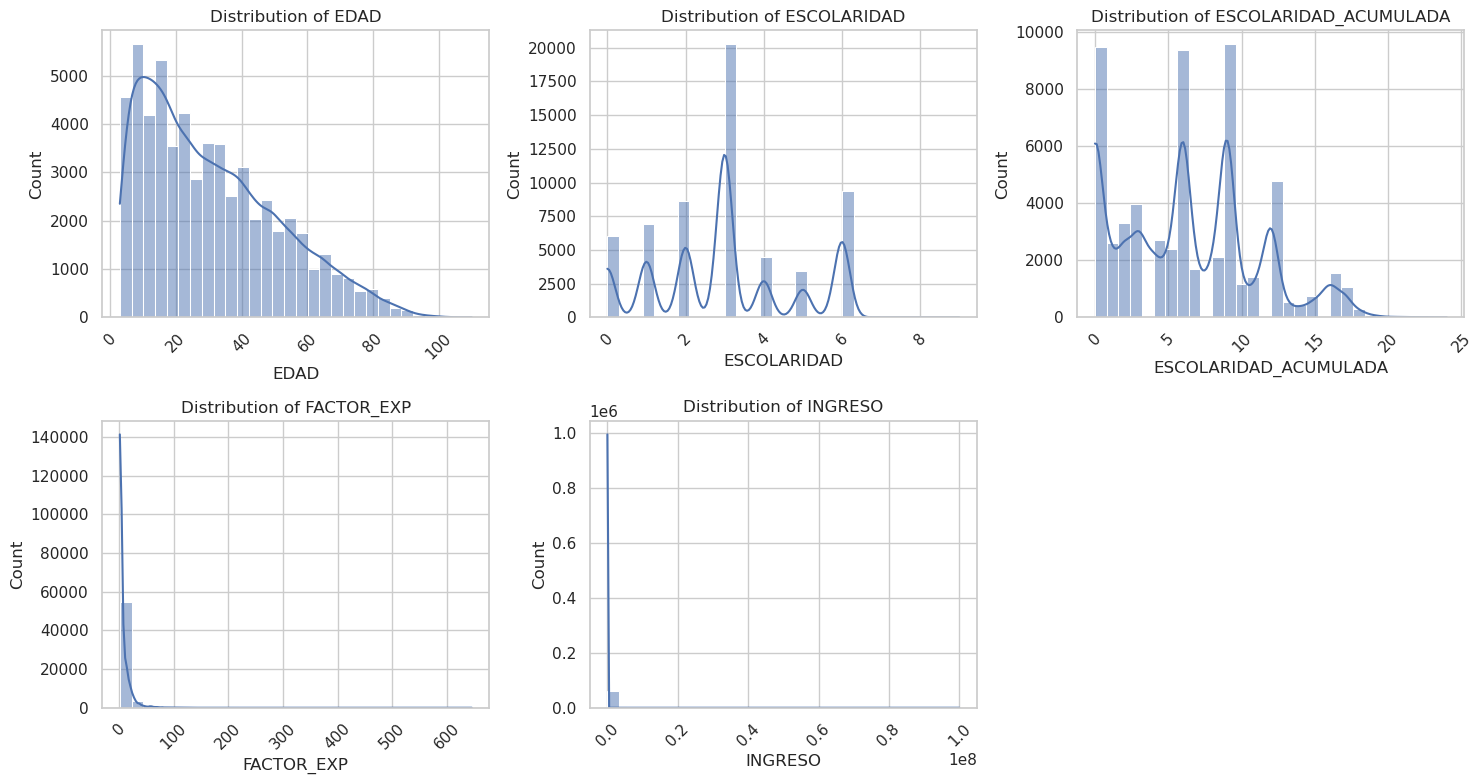

In [18]:
# 3) Plot Continuous Variables (Histograms)
n_cols = 3
n_rows = -(-len(continuous_vars) // n_cols)  # Ceiling division

fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axs = axs.flatten()

for i, col in enumerate(continuous_vars):
    sns.histplot(data=train_data, x=col, ax=axs[i], kde=True, bins=30)
    axs[i].set_title(f"Distribution of {col}")
    axs[i].tick_params(axis='x', rotation=45)

# Remove unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

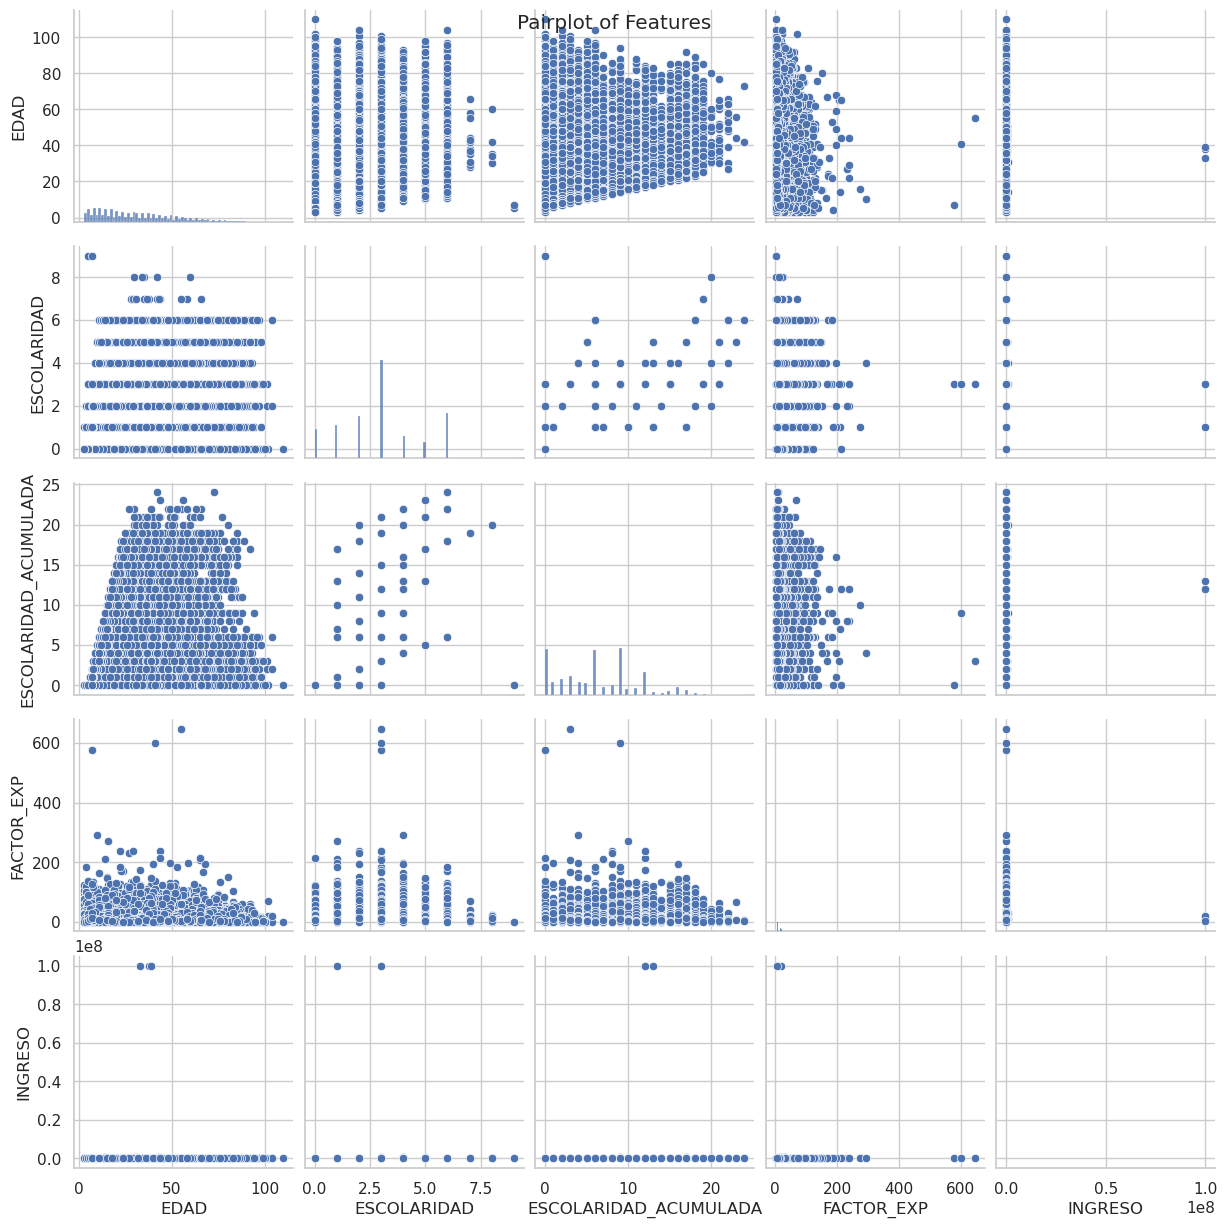

In [15]:
# Plot pairplot to visualize relationships between features
sns.pairplot(train_data[continuous_vars])
plt.suptitle("Pairplot of Features")
plt.show()

/tmp/ipykernel_3011085/541619347.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


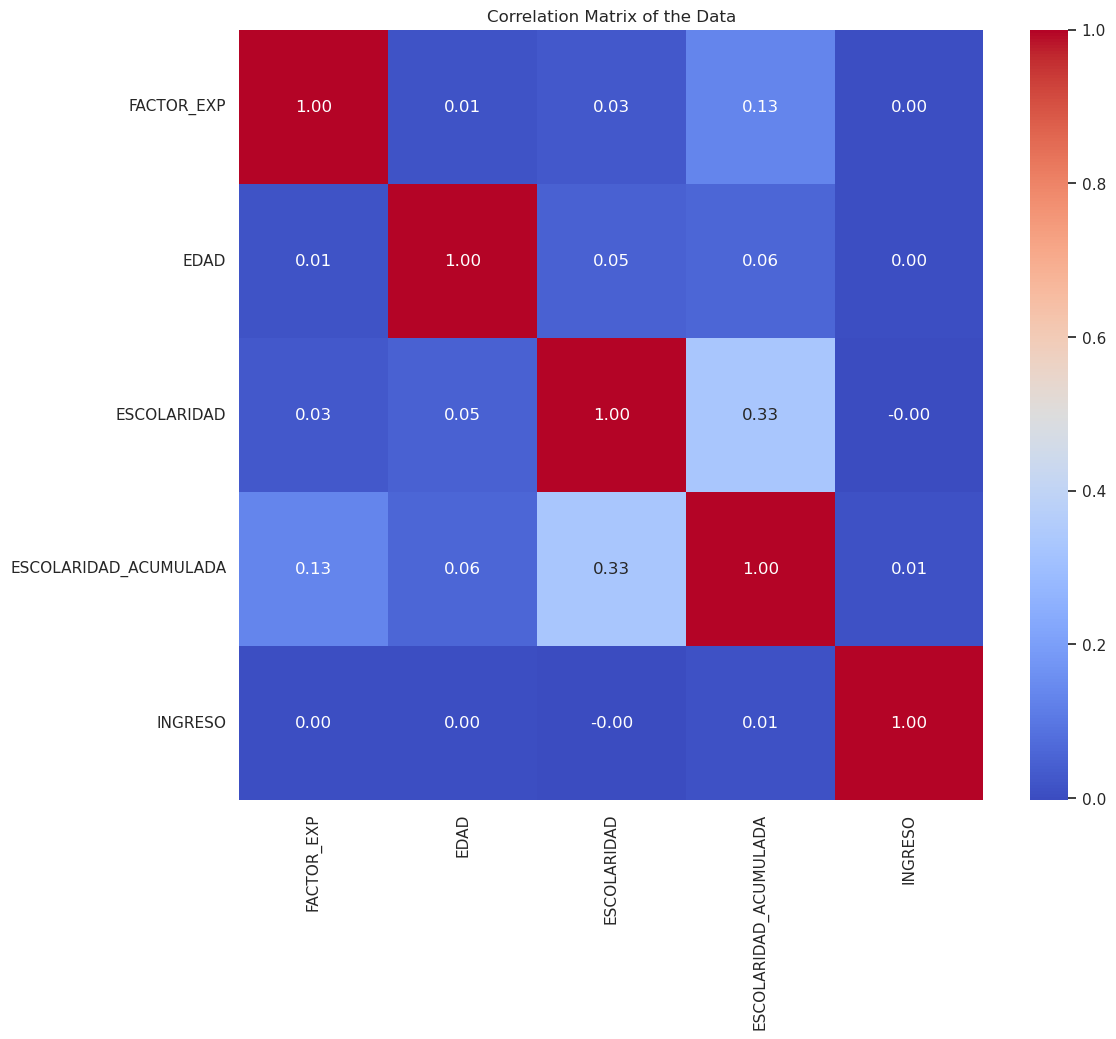

In [19]:
# Calculate the correlation matrix
correlation_matrix = train_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of the Data')
plt.show()

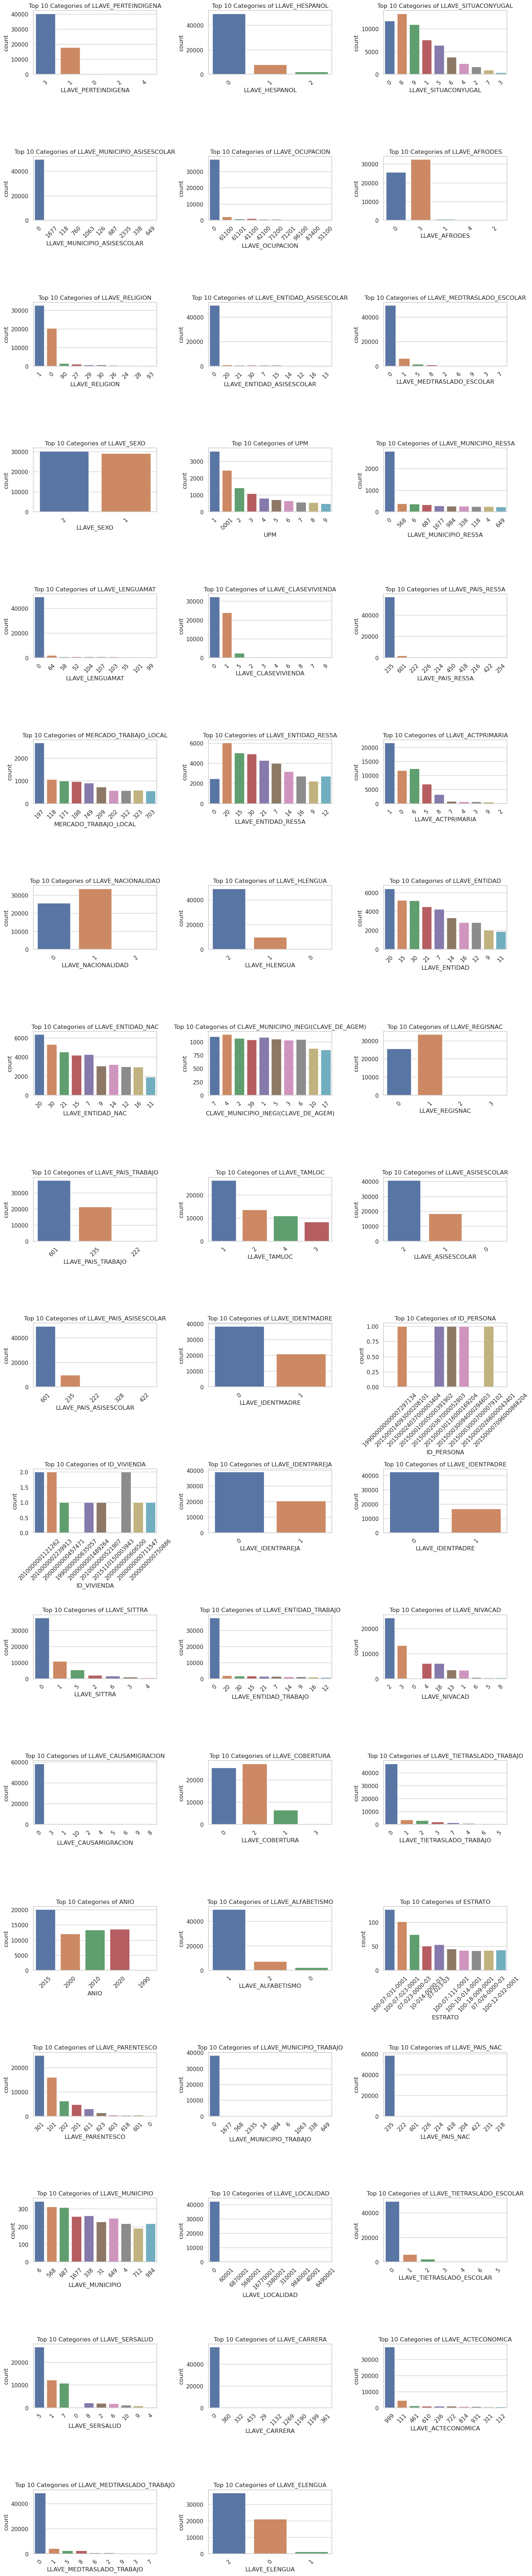

In [20]:
# 4) 4. Plot Categorical Variables (Bar Plots)

n_cols = 3
n_rows = -(-len(categorical_vars) // n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axs = axs.flatten()

for i, col in enumerate(categorical_vars):
    sns.countplot(data=train_data, x=col, ax=axs[i], order=df[col].value_counts().index[:10])
    axs[i].set_title(f"Top 10 Categories of {col}")
    axs[i].tick_params(axis='x', rotation=45)

# Remove unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

After observing the correlation variables, I'll Prepare the Data for Machine Learning Algorithms



of all these variables that are still in the data after the exploratory phase:

# Define your variable lists
numerical_features = [
    'FACTOR_EXP',     # Expansion factor (likely continuous)
    'EDAD',           # Age
    'ESCOLARIDAD',    # Years of schooling
    'ESCOLARIDAD_ACUMULADA',  # Accumulated years of education
    'INGRESO'       # Income
]
categorical_features = [
    'LLAVE_TIETRASLADO_TRABAJO', 'LLAVE_MEDTRASLADO_TRABAJO',  
    'ANIO', 'ID_PERSONA', 'LLAVE_ENTIDAD', 'LLAVE_MUNICIPIO',
    'CLAVE_MUNICIPIO_INEGI(CLAVE_DE_AGEM)', 'LLAVE_LOCALIDAD',
    'ID_VIVIENDA', 'LLAVE_COBERTURA', 'LLAVE_CLASEVIVIENDA', 'LLAVE_SEXO',
    'LLAVE_PARENTESCO', 'LLAVE_IDENTMADRE', 'LLAVE_IDENTPADRE',
    'LLAVE_PAIS_NAC', 'LLAVE_ENTIDAD_NAC', 'LLAVE_NACIONALIDAD',
    'LLAVE_SERSALUD', 'LLAVE_AFRODES', 'LLAVE_REGISNAC', 'LLAVE_RELIGION',
    'LLAVE_HLENGUA', 'LLAVE_LENGUAMAT', 'LLAVE_HESPANOL', 'LLAVE_ELENGUA',
    'LLAVE_PERTEINDIGENA', 'LLAVE_ASISESCOLAR', 'LLAVE_PAIS_ASISESCOLAR',
    'LLAVE_ENTIDAD_ASISESCOLAR', 'LLAVE_MUNICIPIO_ASISESCOLAR',
    'LLAVE_TIETRASLADO_ESCOLAR', 'LLAVE_MEDTRASLADO_ESCOLAR',
    'LLAVE_NIVACAD', 'LLAVE_CARRERA', 'LLAVE_ALFABETISMO',
    'LLAVE_PAIS_RES5A', 'LLAVE_ENTIDAD_RES5A', 'LLAVE_MUNICIPIO_RES5A',
    'LLAVE_CAUSAMIGRACION', 'LLAVE_SITUACONYUGAL', 'LLAVE_IDENTPAREJA',
    'LLAVE_ACTPRIMARIA', 'LLAVE_OCUPACION', 'LLAVE_SITTRA',
    'LLAVE_ACTECONOMICA', 'LLAVE_PAIS_TRABAJO', 'LLAVE_ENTIDAD_TRABAJO',
    'LLAVE_MUNICIPIO_TRABAJO', 'LLAVE_TAMLOC', 'ESTRATO', 'UPM',
    'MERCADO_TRABAJO_LOCAL'
]

i select the variables that are relevant based on: 1) theory/lit review, and 2) based on data quality. For 1, it is know in the lit that .... And for 2) even though there are a a lot of variables that have less that 10% of missing values, in many cases the category that is predominantely present corresponds to a "Not specified" which could potentially adds a lot of noise to the estimations. Having those criteria in mind, the following variables are the survivors. Also, if there are two variables that are super correlated, for example, Education and Acumulated Education, i preserve only one. 

In [21]:
# 🎯 Target Variable
target_variable = ['INGRESO']

# 🌍 Geographical / Labor Market Context
geographical_context = ['MERCADO_TRABAJO_LOCAL']  # Local Labor Market

# 🛠️ Work and Commute Characteristics
work_characteristics = [
    'LLAVE_TIETRASLADO_TRABAJO',  # Commute time to work
    'LLAVE_ACTPRIMARIA'           # Primary activity
]

# 🎓 Education
education_variables = [
    'ESCOLARIDAD_ACUMULADA',      # Accumulated schooling
]

# 🧍 Sociodemographic Characteristics
sociodemographic_variables = [
    'EDAD',                       # Age
    'LLAVE_SITUACONYUGAL',        # Marital status
    'LLAVE_PERTEINDIGENA',        # Indigenous identity
    'LLAVE_RELIGION',             # Religion
    'LLAVE_AFRODES',              # Afrodescendant identity
    'LLAVE_SEXO'                  # Sex
]

# ✅ Combine all selected variables into one list
selected_columns = (
    target_variable + 
    geographical_context +
    work_characteristics +
    education_variables +
    sociodemographic_variables
)

# 🎯 Create a new DataFrame with only the selected variables
train_data_selected = train_data[selected_columns].copy()

# 🖨️ Optional: Check shape and preview
print(f"✅ Selected dataset shape: {train_data_selected.shape}")
train_data_selected.head(5)

✅ Selected dataset shape: (59274, 11)


,INGRESO,MERCADO_TRABAJO_LOCAL,LLAVE_TIETRASLADO_TRABAJO,LLAVE_ACTPRIMARIA,ESCOLARIDAD_ACUMULADA,EDAD,LLAVE_SITUACONYUGAL,LLAVE_PERTEINDIGENA,LLAVE_RELIGION,LLAVE_AFRODES,LLAVE_SEXO
73450,0.0,187,0,5,11.0,17.0,9,3,1,3,2
23242,0.0,118,0,6,12.0,34.0,8,3,1,0,2
48769,0.0,651,0,0,1.0,8.0,0,1,0,3,1
76256,0.0,285,1,2,6.0,16.0,9,3,1,3,1
9274,0.0,247,0,0,0.0,6.0,0,3,1,0,1


I divide these variables into numerical and categorical. 

In [22]:
# ✅ Split into categorical and continuous variable lists
numerical_features = [
    'INGRESO',
    'ESCOLARIDAD_ACUMULADA',
    'EDAD'
]
categorical_features = [
    'MERCADO_TRABAJO_LOCAL',
    'LLAVE_TIETRASLADO_TRABAJO',
    'LLAVE_ACTPRIMARIA',
    'LLAVE_SITUACONYUGAL',
    'LLAVE_PERTEINDIGENA',
    'LLAVE_RELIGION',
    'LLAVE_AFRODES',
    'LLAVE_SEXO'
]

The number of categories in each of the variables is:


In [23]:
# Get categorical columns
categorical_features = train_data_selected.select_dtypes(include='category').columns

# Count number of unique categories for each categorical variable
category_counts = {col: train_data_selected[col].nunique() for col in categorical_features}
category_counts_df = pd.DataFrame.from_dict(category_counts, orient='index', columns=['Num Categories'])

# Sort by number of categories (optional)
category_counts_df = category_counts_df.sort_values(by='Num Categories', ascending=False)

# Display
print(category_counts_df)

                           Num Categories
MERCADO_TRABAJO_LOCAL                 774
LLAVE_RELIGION                         76
LLAVE_ACTPRIMARIA                      10
LLAVE_SITUACONYUGAL                    10
LLAVE_TIETRASLADO_TRABAJO               8
LLAVE_PERTEINDIGENA                     5
LLAVE_AFRODES                           5
LLAVE_SEXO                              2


### 🔧 Preprocessing Pipeline

To handle both numerical and categorical variables efficiently, we define separate pipelines and combine them using `ColumnTransformer` from Scikit-Learn:

There are two types of categorical variables, MERCADO_TRABAJO_LOCAL with a high number of categories (774) categories meanwhile the rest are with low to medium number of categories. To address each of these accordingly, I'll use Target Encoder for MERCADO_TRABAJO_LOCAL, and for the rest I'll use the hot encoder. 


To include these categorical variables in the regression i am going to transform them according to the number of categories that each variable has. 

For low-cardinality variables (≤ 10 categories) Use One-Hot Encoding
For Medium/high-cardinality variables (≫ 10 categories)
Instead, you can:
	•	Use Target Encoding (Mean Encoding)

In [29]:
high_card_cat = ['MERCADO_TRABAJO_LOCAL']
low_card_cat = list(set(categorical_features) - set(high_card_cat))


Scikit-Learn provides a handy class to take care of missing values: SimpleImputer.
Here is how to use it. First, you need to create a SimpleImputer instance, specifying
that you want to replace each attribute’s missing values with the median of that
attribute:

Education has a high NA rate (~10%). so Im gonna  compute the median value on the training set and
use it to fill the missing values in the training set.


In [26]:
# Pipeline for numerical features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler()),
])

# High-cardinality encoding pipeline
high_card_pipeline = Pipeline([
    ('target_encoder', TargetEncoder())
])

# Low-cardinality pipeline (One-Hot Encoding)
low_card_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown="ignore")),
])

# Final column transformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('high_card', high_card_pipeline, high_card_cat),
    ('low_card', low_card_pipeline, low_card_cat),
])

In [ ]:
import sys
print(sys.executable)

/usr/local/anaconda3/bin/python


In [30]:
X_train_prepared = preprocessor.fit_transform(train_data)

## Analysis

Let’s first train a Linear Regression model, like
we did in the previous chapter:

In [35]:
# Instantiate the model
model = LinearRegression()

# Perform 5-fold cross-validation and calculate the mean squared error (negative values)
mse_scores = cross_val_score(model, X_train_prepared, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
mse_scores = -mse_scores

# Compute statistics
mean_mse = mse_scores.mean()
variance_mse = mse_scores.var()

# Display results
print("Mean Squared Error (MSE):", mean_mse)
print("Variance of MSE:", variance_mse)

Mean Squared Error (MSE): 7.910926342671291
Variance of MSE: 3.1549597832321727


In [33]:
# Instantiate the model
lin_reg = LinearRegression()

# Fit the model on the training data
lin_reg.fit(X_train_prepared, y_train)

LinearRegression()